<a href="https://colab.research.google.com/github/Davron030901/Reinforcement-Learning/blob/main/RL_ucb(Upper_Confidence_Bound_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [95]:
!wget https://raw.githubusercontent.com/Davron030901/Reinforcement-Learning/main/data/Ads_CTR_Optimisation.csv

--2025-04-03 06:11:34--  https://raw.githubusercontent.com/Davron030901/Reinforcement-Learning/main/data/Ads_CTR_Optimisation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210050 (205K) [text/plain]
Saving to: ‘Ads_CTR_Optimisation.csv.2’

Ads_CTR_Optimisatio 100%[===================>] 205.13K  --.-KB/s    in 0.04s   

2025-04-03 06:11:34 (5.59 MB/s) - ‘Ads_CTR_Optimisation.csv.2’ saved [210050/210050]



In [96]:
df=pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [97]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [98]:
%%time
row_count = 0
for index, row in df.iterrows():
    if all(value == 0 for value in row):
      row_count += 1
print(f"Number of rows with all zeros: {row_count}")

Number of rows with all zeros: 2576
CPU times: user 273 ms, sys: 20 µs, total: 273 ms
Wall time: 274 ms


In [99]:
%%time
ad_performance = df.sum(axis=1)
ad_performance

max_index = ad_performance.idxmax()
print(f"{ad_performance.max()} The index with the maximum ad performance is: {max_index}")

6 The index with the maximum ad performance is: 2663
CPU times: user 2.33 ms, sys: 24 µs, total: 2.35 ms
Wall time: 2.36 ms


In [100]:
df.head(6)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0


In [101]:
df_transposed = df.transpose()

df_transposed = df_transposed.reset_index()

df_transposed.columns = ['Original_Row_Label'] + list(range(df.shape[0]))


df_transposed


,Original_Row_Label,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Ad 1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,Ad 2,0,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,Ad 3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,Ad 4,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
4,Ad 5,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
5,Ad 6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ad 7,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
7,Ad 8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,Ad 9,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9,Ad 10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
%%time
max=0
for i in range(10000):
  if max<df_transposed[i].sum():
    max=df_transposed[i].sum()
    id=i
print(max)
print(id)

6
2663
CPU times: user 726 ms, sys: 9.71 ms, total: 736 ms
Wall time: 744 ms


In [103]:
df_transposed[id]

,2663
0,1
1,0
2,1
3,1
4,1
5,0
6,0
7,1
8,1
9,0


In [104]:
%%time
max=0
for i in range(10000):
  if df_transposed[i].sum()==0:
    max+=1
print(max)

2576
CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 151 ms


In [105]:
df.isnull().sum().sum()

np.int64(0)

In [106]:
# # Rename columns

# df.rename(columns={'Ad 1':'ad_1',
#                       'Ad 2':'ad_2',
#                       'Ad 3':'ad_3',
#                       'Ad 4':'ad_4',
#                       'Ad 5':'ad_5',
#                       'Ad 6':'ad_6',
#                       'Ad 7':'ad_7',
#                       'Ad 8':'ad_8',
#                       'Ad 9':'ad_9',
#                       'Ad 10':'ad_10'}, inplace=True)

In [107]:
for i in range(len(df.columns)):
    df.rename(columns={f'Ad {i+1}':f'ad_{i+1}'}, inplace=True)

In [108]:
df

,ad_1,ad_2,ad_3,ad_4,ad_5,ad_6,ad_7,ad_8,ad_9,ad_10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


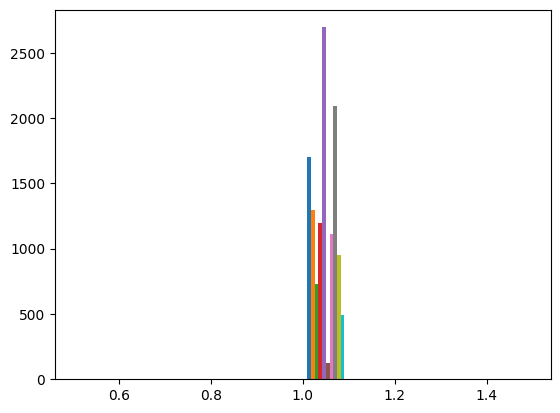

In [109]:
plt.hist(df.where(df == 1), bins=10)
plt.show()

In [110]:
Number_of_users = len(df)   # N - Number of users
d_arms = len(df.columns)     # Variations/arms - number of ads
ads_chosen = []
total_reward = 0

number_selections = [0] * d_arms  # N(i)
sums_of_rewards = [0] * d_arms    # R(i)

In [111]:
for n in range(0, Number_of_users):
  ad = 0
  max_upper_bound = 0
  ub_for_each_ad = {}
  for i in range(0, d_arms):
    if number_selections[i] > 0:
      avg_r = sums_of_rewards[i] / number_selections[i]
      delta_i = math.sqrt(1.5 * math.log(n+1) / number_selections[i])
      upper_bound = avg_r + delta_i
      up_for_each_ad = {i:upper_bound}
      ub_for_each_ad.update(up_for_each_ad)
    else:
      upper_bound = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_chosen.append(ad)
  number_selections[ad] = number_selections[ad] + 1
  reward = df.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward


In [112]:
# finding sum of 1's in ads chosen

ads_chosen_sum = np.sum(ads_chosen)
ads_chosen_sum

np.int64(41500)

In [113]:
# Printing results
print("Total reward: ", total_reward)
print("Ads chosen: ", ads_chosen_sum)
print("Number of times each ad was selected: ", number_selections)

Total reward:  2178
Ads chosen:  41500
Number of times each ad was selected:  [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]


In [114]:
upper_bound

np.float64(0.3101723664789918)

In [115]:
ub_for_each_ad

{0: np.float64(0.31020015423419506),
 1: np.float64(0.31038880170281796),
 2: np.float64(0.3101723664789918),
 3: np.float64(0.3102572913197495),
 4: np.float64(0.31169506812765957),
 5: np.float64(0.3101520925436959),
 6: np.float64(0.3099821719355264),
 7: np.float64(0.3103746154717679),
 8: np.float64(0.31043263680311495),
 9: np.float64(0.3101723664789918)}

In [116]:
result = {}
for i in range(d_arms):
  result[f'ad_{i+1}'] = number_selections[i]
result

{'ad_1': 705,
 'ad_2': 387,
 'ad_3': 186,
 'ad_4': 345,
 'ad_5': 6323,
 'ad_6': 150,
 'ad_7': 292,
 'ad_8': 1170,
 'ad_9': 256,
 'ad_10': 186}

In [117]:
print("Total reward for each ad: ", result)

Total reward for each ad:  {'ad_1': 705, 'ad_2': 387, 'ad_3': 186, 'ad_4': 345, 'ad_5': 6323, 'ad_6': 150, 'ad_7': 292, 'ad_8': 1170, 'ad_9': 256, 'ad_10': 186}


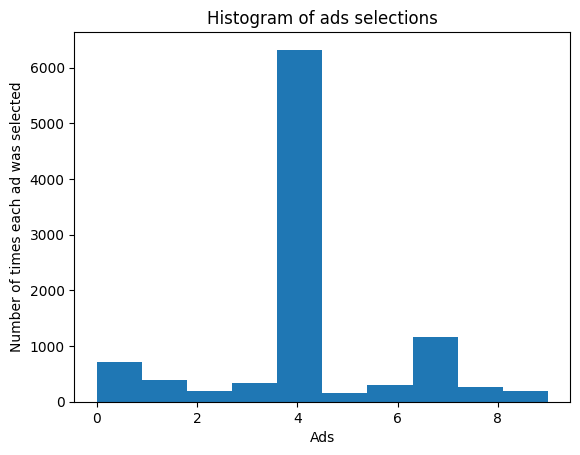

In [118]:
plt.hist(ads_chosen)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()